# World Happiness Report Project

## Import Packages

In [127]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

## Import Dataset

In [128]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Analysis

In [129]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [130]:
data.shape

(158, 12)

## Null values

In [131]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## Checking Duplicate values

In [132]:
data.duplicated().sum()

0

## Converting Categorical Data to Numerical Data

In [133]:
le = LabelEncoder()

In [134]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [135]:
data.Country = le.fit_transform(data.Country)
data.Region = le.fit_transform(data.Region)
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Checking Skewness

In [136]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


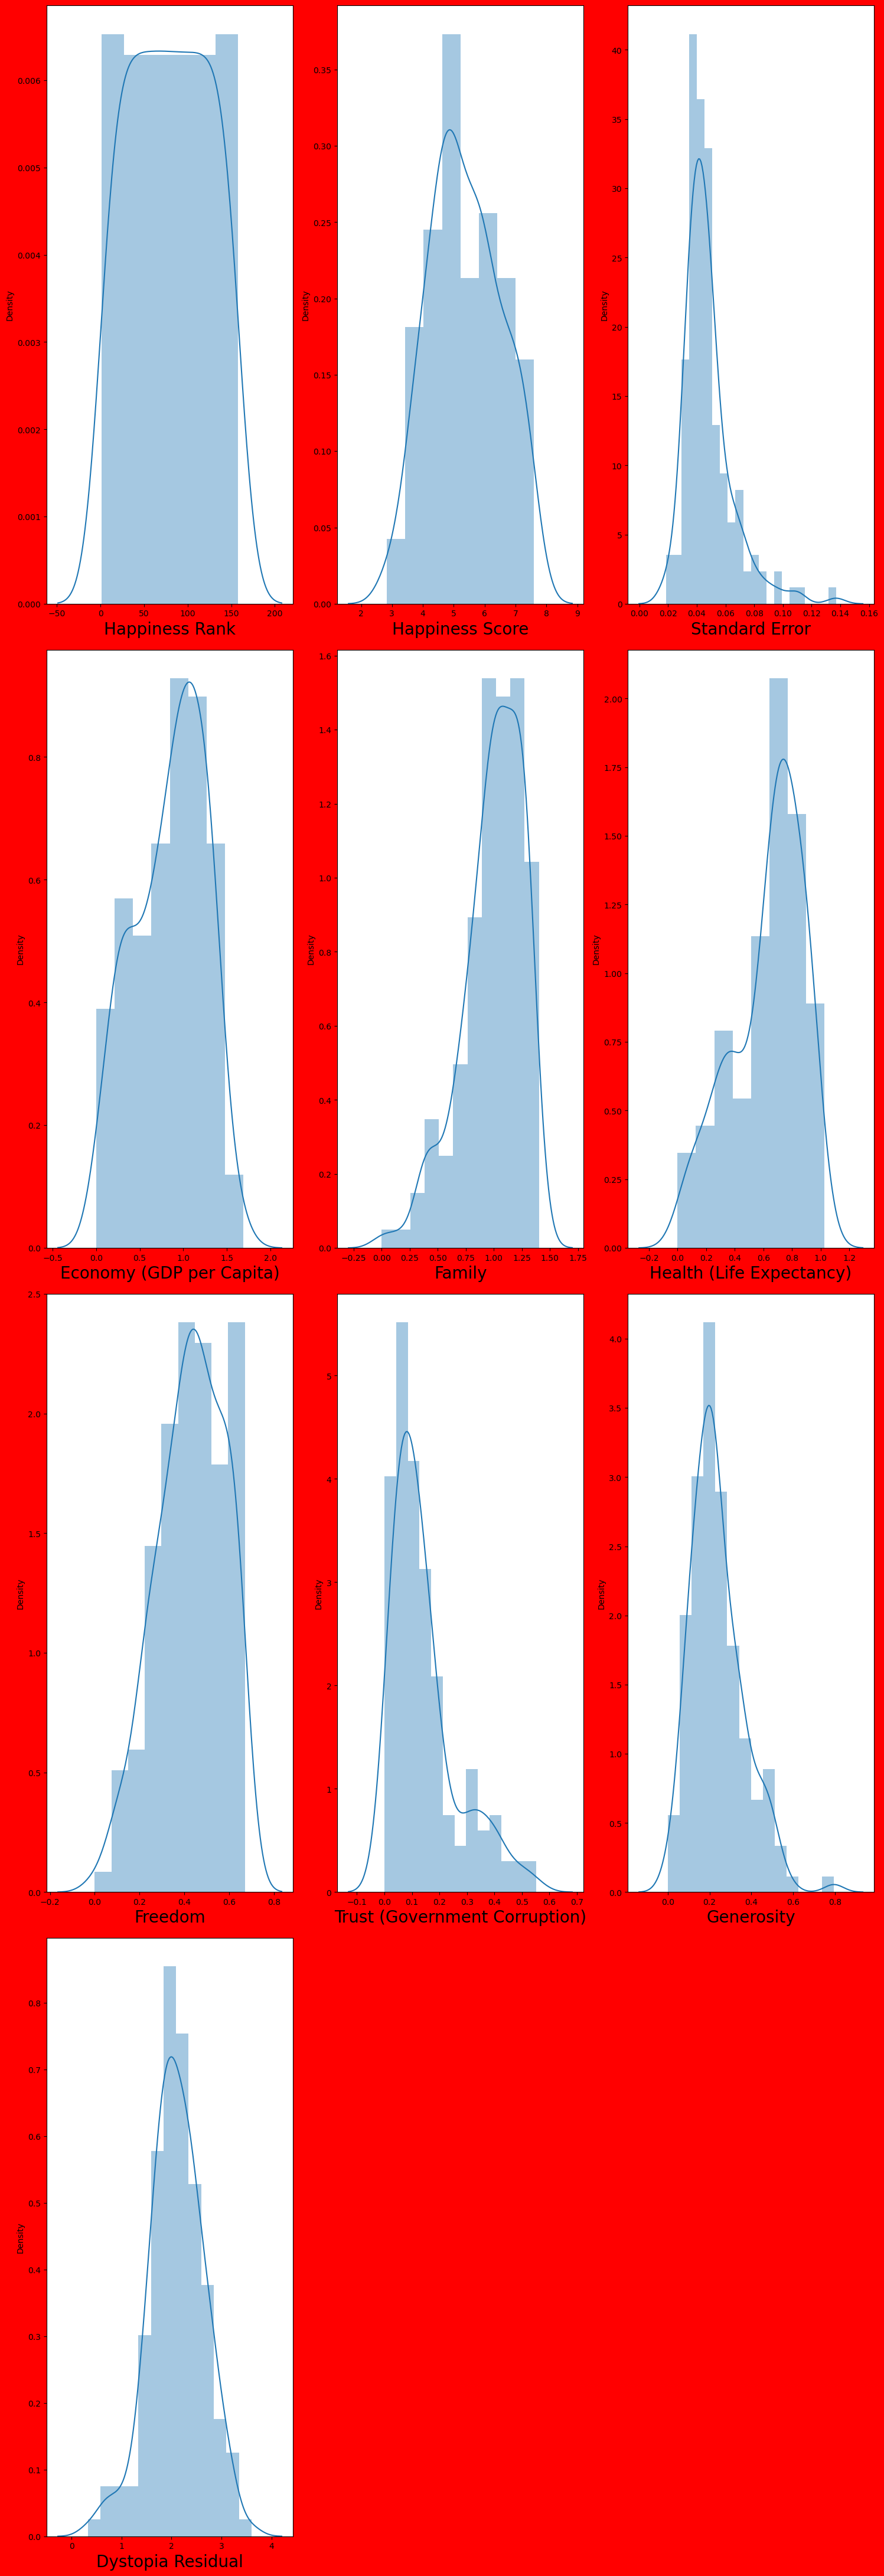

In [137]:
x = data.drop(columns=['Country', 'Region'],axis=1)

plt.figure(figsize=(15,65), facecolor='red')
plotnumber = 1

for column in x:
    
    if plotnumber<=16:                    
        ax = plt.subplot(6,3,plotnumber)    
        sns.distplot(data[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1   
plt.tight_layout()   

## Checking Outliners

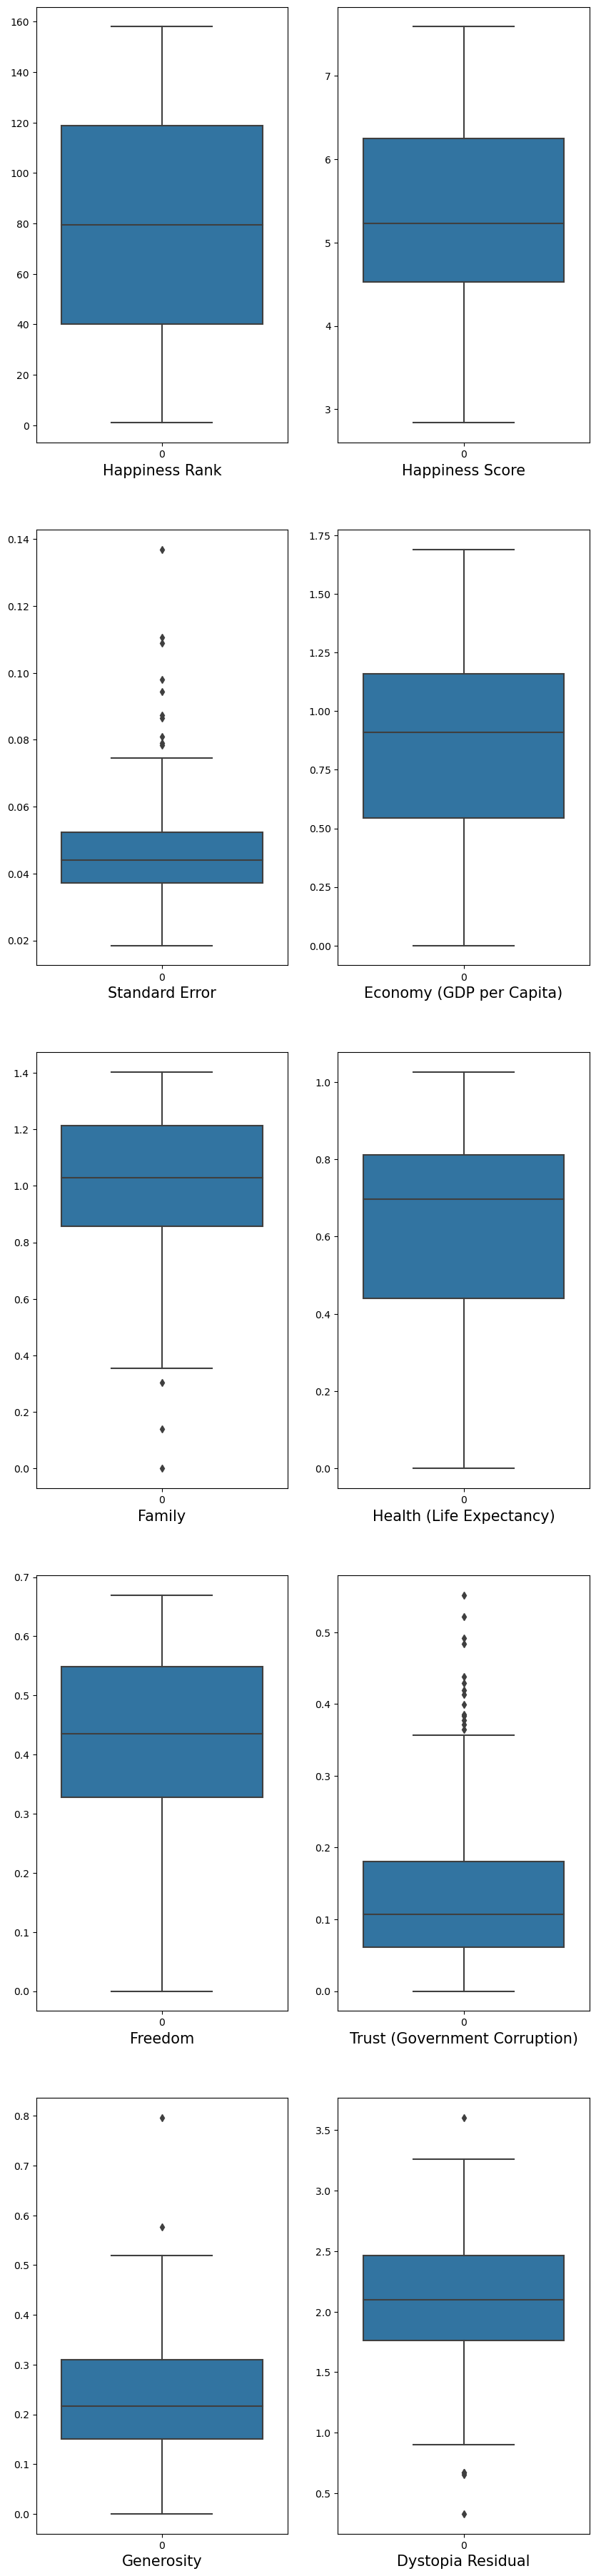

In [138]:
df_features = data.drop(columns=['Country', 'Region'],axis=1)

plt.figure(figsize=(10,65))
graph = 1

for column in df_features:        
    if graph<=13:
        plt.subplot(7,2, graph)
        ax=sns.boxplot(data= df_features [column])    
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

## Removing Outliners & Skewness

In [139]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [140]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [141]:
from scipy.stats import zscore 

z_score = zscore (data[['Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2).all(axis=1)
data = data[filtering_entry]

data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,76.466667,4.825000,78.775000,5.393458,0.046430,0.863879,1.028920,0.636508,0.413885,0.122494,0.212527,2.115268
std,45.162812,3.047695,42.141311,1.021167,0.011784,0.372783,0.210076,0.239089,0.146470,0.088615,0.106310,0.467565
min,1.000000,0.000000,2.000000,3.587000,0.018480,0.000000,0.464750,0.000000,0.000000,0.002270,0.000000,0.998950
25%,38.750000,2.000000,45.750000,4.639750,0.038282,0.594172,0.891802,0.460545,0.320625,0.058570,0.126970,1.791085
50%,74.500000,4.000000,78.500000,5.260500,0.044515,0.919550,1.033960,0.700925,0.416795,0.104710,0.203505,2.074475
75%,112.250000,8.000000,113.250000,5.989000,0.051095,1.148357,1.217087,0.800358,0.531430,0.157820,0.272970,2.447057
max,157.000000,9.000000,152.000000,7.561000,0.080960,1.563910,1.402230,0.991110,0.669730,0.377980,0.479980,3.191310


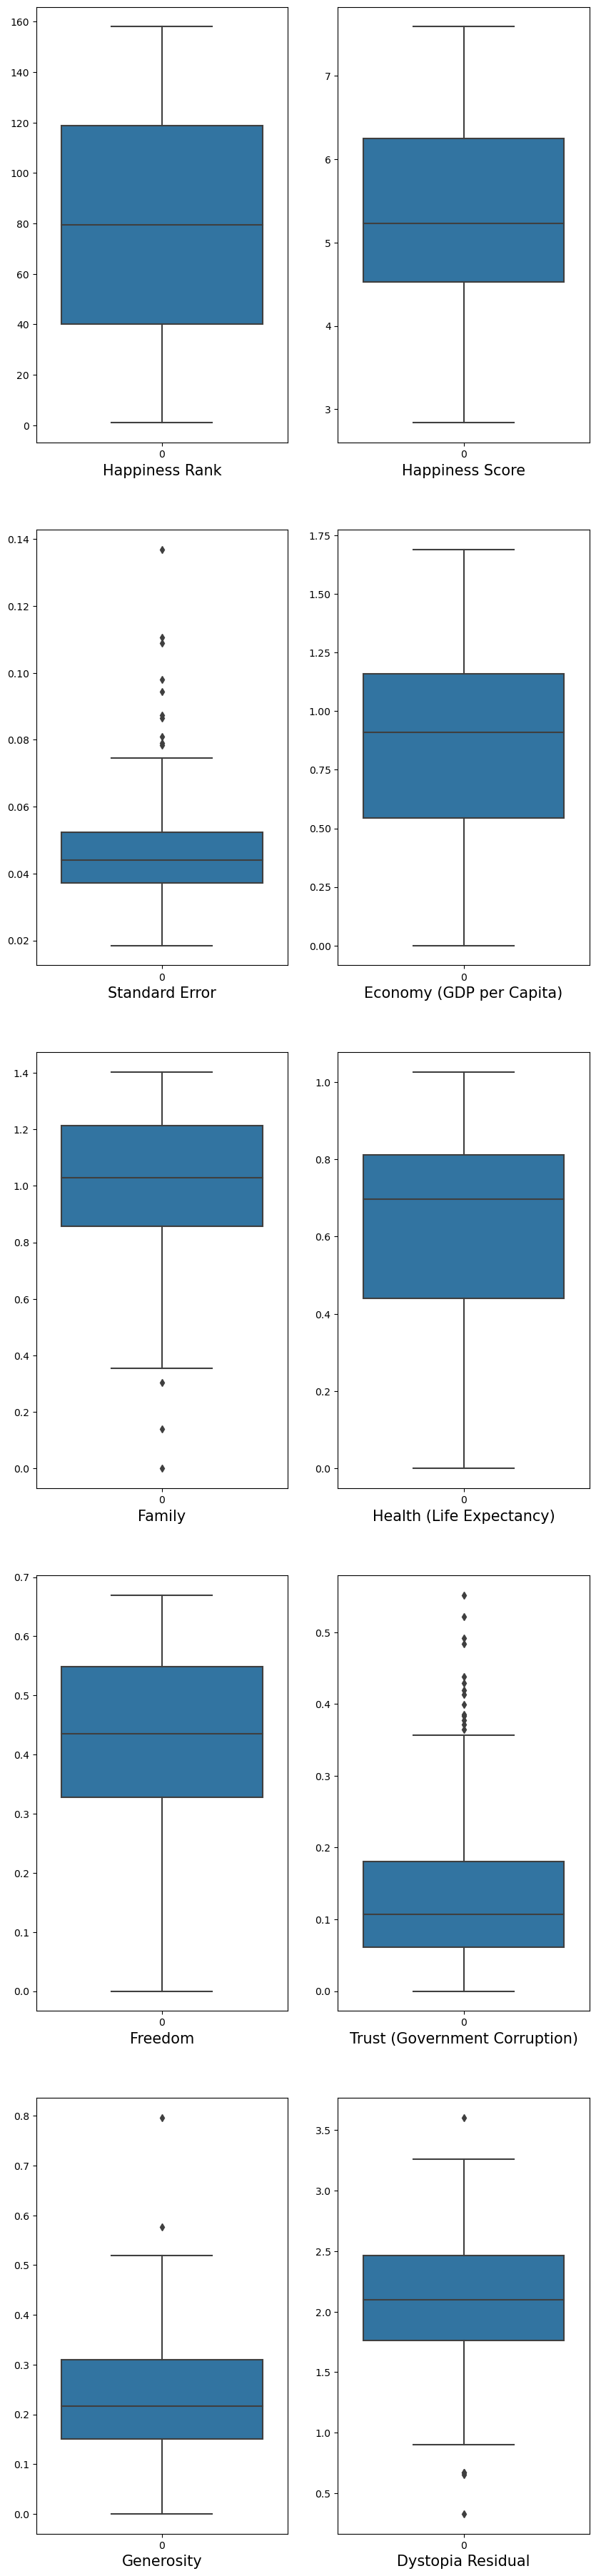

In [142]:
x = data.drop(columns=['Country', 'Region'],axis=1)

plt.figure(figsize=(10,65))
graph = 1

for column in x:        
    if graph<=13:
        plt.subplot(7,2, graph)
        ax=sns.boxplot(data= df_features [column])    
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [143]:
data.shape

(120, 12)

## Checking Multicollinearity

In [144]:
corr = data.corr()
corr

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,-0.025715,0.003208,-0.017910,-0.027153,-0.076274,0.095142,-0.022400,0.018967,-0.051528,-0.000224,-0.005633
Region,-0.025715,1.000000,0.249697,-0.202486,0.002725,-0.231128,-0.145469,-0.361071,0.094736,0.192213,0.269339,-0.135202
Happiness Rank,0.003208,0.249697,1.000000,-0.993415,0.179787,-0.760918,-0.721667,-0.755636,-0.552200,-0.362828,-0.219265,-0.560743
Happiness Score,-0.017910,-0.202486,-0.993415,1.000000,-0.182854,0.757560,0.719676,0.742393,0.559775,0.389841,0.259539,0.568823
Standard Error,-0.027153,0.002725,0.179787,-0.182854,1.000000,-0.187591,-0.181664,-0.253225,-0.125058,-0.040531,0.001840,0.007713
Economy (GDP per Capita),-0.076274,-0.231128,-0.760918,0.757560,-0.187591,1.000000,0.582434,0.801000,0.296661,0.247803,-0.026061,0.051984
Family,0.095142,-0.145469,-0.721667,0.719676,-0.181664,0.582434,1.000000,0.493883,0.485970,0.256688,0.166174,0.166904
Health (Life Expectancy),-0.022400,-0.361071,-0.755636,0.742393,-0.253225,0.801000,0.493883,1.000000,0.293397,0.114750,0.077511,0.118251
Freedom,0.018967,0.094736,-0.552200,0.559775,-0.125058,0.296661,0.485970,0.293397,1.000000,0.472193,0.413638,0.120942
Trust (Government Corruption),-0.051528,0.192213,-0.362828,0.389841,-0.040531,0.247803,0.256688,0.114750,0.472193,1.000000,0.301029,0.074020


In [145]:
corr['Dystopia Residual']

Country                         -0.005633
Region                          -0.135202
Happiness Rank                  -0.560743
Happiness Score                  0.568823
Standard Error                   0.007713
Economy (GDP per Capita)         0.051984
Family                           0.166904
Health (Life Expectancy)         0.118251
Freedom                          0.120942
Trust (Government Corruption)    0.074020
Generosity                       0.059365
Dystopia Residual                1.000000
Name: Dystopia Residual, dtype: float64

In [146]:
x = data.drop(columns = ['Dystopia Residual'])
y = data['Dystopia Residual']


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,Country,4.051171
1,Region,5.058562
2,Happiness Rank,7.104251
3,Happiness Score,124.456018
4,Standard Error,18.053496
5,Economy (GDP per Capita),26.514681
6,Family,58.302750
7,Health (Life Expectancy),33.079701
8,Freedom,17.363789
9,Trust (Government Corruption),4.416132


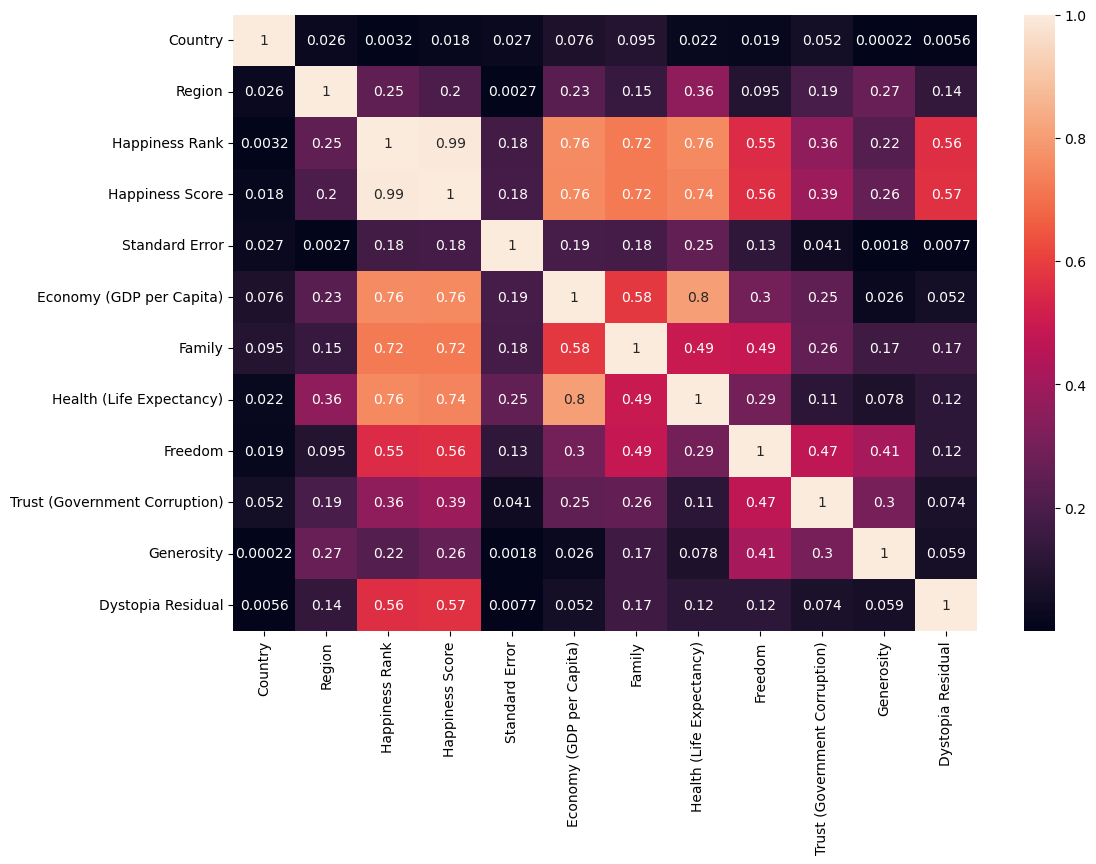

In [147]:
df_corr = data.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

## Feature Selection

In [148]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [149]:
data= data.drop(columns = ['Country'])
data= data.drop(columns = ['Region'])
data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


## Separating Features & Labels

In [150]:
Features = data.drop(columns=['Dystopia Residual'],axis=1)
Label = data['Dystopia Residual']

## Standardizing Features

In [151]:
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features)

In [152]:
Features_scaled

array([[-1.82948529,  2.13151143,  0.20538783, ...,  1.47324408,
         0.21481466,  2.1137329 ],
       [-1.78182693,  2.09315972, -0.6501936 , ...,  1.75406387,
         2.74845197,  1.27012073],
       [-1.75799775,  1.99973886, -0.92885408, ...,  1.50203908,
         2.34661469,  2.31974769],
       ...,
       [ 1.69723334, -1.70857721, -0.89732369, ..., -0.25116494,
        -0.01250784,  0.69940024],
       [ 1.72106252, -1.70956059,  0.42439623, ...,  0.37553762,
         0.64282916, -0.10274449],
       [ 1.7448917 , -1.77643025, -0.2718289 , ..., -0.12995171,
         0.06602381,  0.04668945]])

## Test - Train Split

In [153]:
x_train,x_test,y_train,y_test = train_test_split(Features_scaled, Label, test_size = 0.25, random_state=348)

# Linear Regression

### Creating Linear Regression model

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

### Training the Model

In [29]:
reg.fit(x_train, y_train)

LinearRegression()

### Finding Co-efficient

In [30]:
reg.coef_

array([ 1.88597103e-04,  1.01695717e+00, -7.34403016e-06, -3.71176121e-01,
       -2.09195014e-01, -2.38043750e-01, -1.45762703e-01, -8.82336847e-02,
       -1.05890069e-01])

### Finding Co-efficient

In [31]:
reg.intercept_

2.1153105467072497

### Accuracy score of Training data

In [32]:
print('Accuracy Score:',reg.score(x_train, y_train))

Accuracy Score: 0.999999719518975


### Predicting Testing Label values

In [33]:
y_pred = reg.predict(x_test)
y_pred

array([1.58839011, 2.84825065, 1.63813537, 2.32311517, 3.03478339,
       1.76147508, 1.62267037, 2.1156741 , 1.26513916, 1.44428729,
       1.21368915, 2.43247481, 1.75886466, 2.53921449, 1.24130679,
       2.20796595, 1.93119967, 1.86616   , 1.95083155, 2.21131284,
       1.86976786, 1.8767297 , 2.11818062, 1.68170189, 2.12518463,
       2.75458695, 2.05118911, 2.08484063, 2.45374069, 1.73840293])

### Accuracy score of Training data

In [34]:
print('Accuracy Score:',reg.score(x_test,y_test))

Accuracy Score: 0.9999993359754897


### r2 score

In [35]:
r2_score(y_test, y_pred)

0.9999993359754897

### Finding Error Score

In [36]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 1.3543375492065313e-07
RMSE 0.0003680132537296084
MAE 0.0003077849553607681


### Prediction

In [37]:
reg.predict([[2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])

array([8.65221181])

# SVR

### Hypermarameter tunning

In [70]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)

In [74]:
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}

### Creating SVR model

In [75]:
reg_SVR = SVR(C=100, gamma= 0.01, kernel= 'sigmoid')

In [76]:
reg_SVR.fit(x_train, y_train)

SVR(C=100, gamma=0.01, kernel='sigmoid')

### Accuracy score of Training data

In [77]:
print('Accuracy Score:',reg_SVR.score(x_train, y_train))

Accuracy Score: 0.9852182689095935


### Predicting Testing Label values

In [78]:
y_pred = reg_SVR.predict(x_test)
y_pred

array([1.63837941, 2.8126682 , 1.7615399 , 2.37182073, 3.0580013 ,
       1.89625895, 1.67863523, 2.08993714, 1.34136508, 1.45445663,
       1.32198505, 2.42848087, 1.72942214, 2.58065584, 1.30342164,
       2.20173758, 1.99955137, 1.90651012, 1.86686362, 2.21531851,
       1.89393302, 1.89759416, 2.06125189, 1.6612032 , 2.07906703,
       2.71856781, 2.02750164, 2.12586814, 2.40808444, 1.83313427])

### Accuracy score of Testing data

In [79]:
print('Accuracy Score:', reg_SVR.score(x_test,y_test))

Accuracy Score: 0.983142509348281


### r2 score

In [80]:
r2_score(y_test, y_pred)

0.983142509348281

### Finding Error Score

In [81]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.0034382364240798887
RMSE 0.05863647690712573
MAE 0.04812579308413777


### Prediction

In [82]:
reg_SVR.predict([[2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])

array([4.81262297])

# Creating Lasso Regression model

In [85]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)   
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [86]:
alpha = lasscv.alpha_
alpha

2.9051852618945092e-05

In [87]:
reg_lasso = Lasso(alpha)      # Passing Learning rate/speed to LASSO
reg_lasso.fit(x_train, y_train)

Lasso(alpha=2.9051852618945092e-05)

### Checking Accuracy Score of Training Data

In [88]:
print('Accuracy Score:',reg_lasso.score(x_train, y_train))

Accuracy Score: 0.9999972225754521


### Checking Accuracy Score of Testing Data

In [89]:
print('Accuracy Score:',reg_lasso.score(x_test,y_test))

Accuracy Score: 0.999996033295854


### Printing the Predicted Values

In [90]:
y_pred = reg_lasso.predict(x_test)
print(y_pred)

[1.58890114 2.84743176 1.64023665 2.3238331  3.03511166 1.762612
 1.62308199 2.11564682 1.26514744 1.44402662 1.21400729 2.43254618
 1.75735809 2.5397757  1.24097243 2.20744509 1.93131397 1.86627515
 1.94957863 2.21122395 1.87064434 1.87763969 2.11753831 1.6811783
 2.12428921 2.75403575 2.05034523 2.08569325 2.45338709 1.73998621]


### Finding Error Score

In [91]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

r2s = r2_score(y_test, y_pred)
print('R2_Score',r2s)

MSE 8.090448905060719e-07
RMSE 0.0008994692271034468
MAE 0.0006938857925192998
R2_Score 0.999996033295854


### Prediction

In [92]:
reg_lasso.predict([[2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])

array([8.58408606])

# Ridge Regression Regularization model

### Creating Ridge Regression Regularization model

In [95]:
ridgecv = RidgeCV(alphas = np.arange(1,100,10), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), normalize=True)

In [96]:
alpha = ridgecv.alpha_
alpha

1

In [97]:
reg_rid = Ridge(alpha=ridgecv.alpha_)           # Passing Learning rate/speed to Ridge
reg_rid.fit(x_train, y_train)

Ridge(alpha=1)

### Checking Accuracy Score

In [98]:
print('Accuracy Score:',reg_rid.score(x_train, y_train))

Accuracy Score: 0.9921729118901232


### Checking Accuracy Score of Testing Data

In [99]:
print('Accuracy Score:',reg_rid.score(x_test, y_test))

Accuracy Score: 0.9887394969766243


### Printing the Predicted Values

In [100]:
y_pred = reg_rid.predict(x_test)
print(y_pred)

[1.63743107 2.79144802 1.75556182 2.35217912 3.01832813 1.83617781
 1.66336934 2.12000753 1.30634165 1.45412168 1.27363261 2.42434591
 1.69733787 2.55063928 1.26729708 2.17838911 1.94720565 1.89095353
 1.89739273 2.21033571 1.92194464 1.93327582 2.08022824 1.66955092
 2.07356423 2.7016662  2.00881042 2.12160749 2.41645557 1.83142842]


### Finding Error Score

In [101]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

r2s = r2_score(y_test, y_pred)
print('R2_Score',r2s)

MSE 0.0022966805943020734
RMSE 0.0479236955409542
MAE 0.04021971535177917
R2_Score 0.9887394969766243


### Prediction

In [97]:
reg_rid.predict([[2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])

array([5.25072627])

# GradientBoostingRegressor

### Hyperparameter Tunning

In [157]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
param_grid = {'n_estimators': range(50, 250, 10),
              'learning_rate': [0.05, 0.1, 0.15],
              'max_depth': range(3, 6),
              'min_samples_split': range(2, 5)}
gridsearch = GridSearchCV(estimator=gb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': range(3, 6),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(50, 250, 10)})

In [158]:
gridsearch.best_params_

{'learning_rate': 0.15,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

### Creating GradientBoostingRegressor model

In [840]:
gb = GradientBoostingRegressor(n_estimators=210, learning_rate=0.5, min_samples_split=2,max_depth=3)

### Training the Model

In [841]:
gb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=210)

### Accuracy score of Training data

In [842]:
print('Accuracy Score:',gb.score(x_train, y_train))

Accuracy Score: 0.999999999999999


### Predicting Testing Label values

In [843]:
y_pred = gb.predict(x_test)

### Accuracy score of Testing data

In [844]:
print('Accuracy Score:', gb.score(x_test,y_test))

Accuracy Score: 0.591530925504886


### r2 score

In [845]:
r2_score(y_test, y_pred)

0.591530925504886

### Finding Error Score

In [846]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.08331093156478095
RMSE 0.28863633098551705
MAE 0.22694275059343652


# DecisionTreeRegressor

### Hypermarameter tunning

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
from sklearn.model_selection import GridSearchCV
dr = DecisionTreeRegressor()
param_grid = {"criterion":['squared_error','absolute_error','poisson'],
              'min_samples_split': [1,2,3,4,5,6], 
              'max_depth': [1,3,5,7,9,11,12],
              }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'absolute_error', 'max_depth': 1, 'min_samples_split': 2}

### Creating DecisionTreeRegressor model

In [41]:
reg_dec = DecisionTreeRegressor(criterion='absolute_error',min_samples_leaf= 1, min_samples_split=2,max_depth=7)

### Training the Model

In [42]:
reg_dec.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7)

### Accuracy score of Training data

In [43]:
print('Accuracy Score:',reg_dec.score(x_train, y_train))

Accuracy Score: 0.8797796564831714


### Predicting Testing Label values

In [44]:
y_pred = reg_dec.predict(x_test)
y_pred

array([2.2327  , 2.74255 , 2.2327  , 2.074425, 2.5945  , 2.09066 ,
       1.5714  , 2.074425, 1.34759 , 1.94296 , 2.09066 , 2.76579 ,
       1.94296 , 2.24639 , 1.5714  , 1.94296 , 1.94296 , 1.88736 ,
       1.94296 , 2.074425, 1.59888 , 2.074425, 1.94296 , 1.94296 ,
       1.94296 , 2.76579 , 2.09066 , 2.76579 , 1.94296 , 2.32407 ])

### Accuracy score of Testing data

In [45]:
print('Accuracy Score:',reg_dec.score(x_test,y_test))

Accuracy Score: 0.3593802806885048


### r2 score

In [46]:
r2_score(y_test, y_pred)

0.3593802806885048

### Finding Error Score

In [47]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.13066013788333333
RMSE 0.3614694148656748
MAE 0.2805483333333333


### Prediction

In [48]:
reg_dec.predict([[2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])

array([2.70201])

# Random Forest Regressor

### Hypermarameter tunning

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [866]:
rf = RandomForestRegressor()
param_grid = {'criterion': ['mse', 'mae', 'friedman_mse'],
              'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

### Creating Random Forest Regressor model

In [52]:
reg_rf = RandomForestRegressor(n_estimators=25,criterion='mse',min_samples_leaf=2,max_features=8,min_samples_split=3,max_depth=19)

### Training the Model

In [53]:
reg_rf.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=19, max_features=8,
                      min_samples_leaf=2, min_samples_split=3, n_estimators=25)

### Accuracy score of Training data

In [54]:
print('Accuracy Score:',reg_rf.score(x_train, y_train))

Accuracy Score: 0.8873229070496886


### Predicting Testing Label values

In [55]:
y_pred = reg_rf.predict(x_test)
y_pred

array([2.11012689, 2.71657976, 2.0631361 , 2.49808051, 2.72220902,
       2.17367697, 1.92598352, 2.31381109, 1.84132875, 1.68874432,
       1.92993907, 2.27795531, 1.85843603, 2.3455364 , 1.70789531,
       2.05542515, 2.01155799, 2.05107973, 1.72777713, 2.21704499,
       2.3227971 , 2.3942002 , 2.14736717, 1.87716057, 1.88840943,
       2.22580828, 2.06651458, 2.2396947 , 2.11199159, 2.2640076 ])

### Accuracy score of Testing data

In [56]:
print('Accuracy Score:',reg_rf.score(x_test,y_test))

Accuracy Score: 0.43191476660680705


### r2 score

In [57]:
r2_score(y_test, y_pred)

0.43191476660680705

### Finding Error Score

In [58]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.11586607887190008
RMSE 0.3403910675559805
MAE 0.28601203791005275


### Prediction

In [59]:
reg_rf.predict([[2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])

array([1.89013446])

# KNeighbors Regressor

### Hypermarameter tunning

In [89]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

### Creating KNeighbors Regressor model

In [61]:
reg_KN = KNeighborsRegressor(algorithm= 'kd_tree', leaf_size = 3, n_neighbors = 8)

### Training the Model

In [62]:
reg_KN.fit(x_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=8)

### Accuracy score of Training data

In [63]:
print('Accuracy Score:',reg_KN.score(x_train, y_train))

Accuracy Score: 0.4928122426622167


### Predicting Testing Label values

In [64]:
y_pred = reg_KN.predict(x_test)
y_pred

array([2.20595875, 2.55851375, 1.93428125, 2.38784875, 2.64654   ,
       2.18245   , 1.9659175 , 2.23436625, 2.1125075 , 1.82592375,
       2.1010325 , 2.09209   , 1.73259125, 2.21189375, 1.8936925 ,
       2.161385  , 2.01818625, 2.39985875, 1.749925  , 2.340275  ,
       2.127195  , 2.2102525 , 2.03319   , 1.9429925 , 1.7669525 ,
       2.02634   , 2.16797   , 2.12436   , 1.95525375, 2.17350875])

### Accuracy score of Testing data

In [65]:
print('Accuracy Score:', reg_KN.score(x_test,y_test))

Accuracy Score: 0.17659494511361196


### r2 score

In [66]:
r2_score(y_test, y_pred)

0.17659494511361196

### Finding Error Score

In [67]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.1679408465929166
RMSE 0.40980586451747686
MAE 0.33720975000000003


### Prediction

In [68]:
reg_KN.predict([[2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])

array([2.6958925])